<a href="https://colab.research.google.com/github/danhillcode/MachineLearning/blob/master/Neural_CardioTraining_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [2]:
# max heart rate
age    = np.array([40, 10,  0,  8, 15, 22,  38],  dtype=float)
max_rate = np.array([180,  210, 220, 212, 205, 198, 182],  dtype=float)

for i,c in enumerate(age):
  print("{} age = {} max rate".format(c, max_rate[i]))

40.0 age = 180.0 max rate
10.0 age = 210.0 max rate
0.0 age = 220.0 max rate
8.0 age = 212.0 max rate
15.0 age = 205.0 max rate
22.0 age = 198.0 max rate
38.0 age = 182.0 max rate


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [4]:
model = tf.keras.Sequential([l0])

In [32]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0001))

In [33]:
history = model.fit(age, max_rate, epochs=100, verbose=False)
print("Finished training the model")

Finished training the model


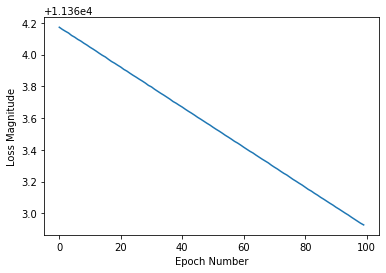

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [35]:
print(model.predict([0]))

[[41.057205]]


Prediction not so great for the above 

In [39]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(age, max_rate, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([32.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[194.23512]]
Model predicts that 100 degrees Celsius is: [[139.1628]] degrees Fahrenheit
These are the l0 variables: [array([[-0.81652683, -0.06463291,  0.02865098,  0.62286997]],
      dtype=float32), array([-5.8162093, -5.828515 ,  5.9335074, -4.901283 ], dtype=float32)]
These are the l1 variables: [array([[ 1.801551  ,  1.8039445 ,  0.7485568 , -0.22696654],
       [ 1.9149489 ,  2.2363327 ,  0.33292776, -0.9638346 ],
       [-2.1690822 , -1.2662724 , -0.07151352,  0.7129134 ],
       [ 3.232084  ,  2.0994217 ,  1.5896509 , -1.4298596 ]],
      dtype=float32), array([-5.7472973 , -5.4447393 , -0.92791796,  4.7271094 ], dtype=float32)]
These are the l2 variables: [array([[-1.7404518 ],
       [-1.849255  ],
       [-0.48301977],
       [ 1.0573804 ]], dtype=float32), array([4.3425717], dtype=float32)]


Altered and now it is showing optimal outputs for heart rate max training predicition based on age